### 식수인원 분석 프로젝트

In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
plt.rcParams['font.size'] = 15

import warnings 
warnings.filterwarnings(action='ignore')

In [77]:
#불러올 파일의 경로를 filename 변수에 저장
path = './data/'
train_raw = pd.read_csv(path+'train.csv', encoding='cp949')    
test_raw = pd.read_csv(path+'test.csv', encoding='cp949')
submission = pd.read_csv(path+'sample_submission.csv', encoding='cp949')
#pandas read_csv로 불러오기
train_raw.head()

,일자,요일,총인원,아침메뉴,점심메뉴,저녁메뉴,점심인원,저녁인원
0,2016-02-01,월,2601,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,화,2601,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560
2,2016-02-03,수,2601,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573
3,2016-02-04,목,2601,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978,525
4,2016-02-05,금,2601,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925,330


In [78]:
print(' train shape: ', train_raw.shape, '\n', 'test shape: ', test_raw.shape)
#중식인원, 석식인원을 예측하자

 train shape:  (1205, 8) 
 test shape:  (50, 6)


1. 데이터 전처리


In [79]:
train = train_raw.copy()

train.columns = ['date', 'dow', 'total', 'brk', 'ln', 'dn', 'target_ln', 'target_dn']
train.head(2)

,date,dow,total,brk,ln,dn,target_ln,target_dn
0,2016-02-01,월,2601,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,화,2601,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560


In [80]:
test = test_raw.copy()
test.columns = ['date', 'dow', 'total', 'brk', 'ln', 'dn']
test.head(2)

,date,dow,total,brk,ln,dn
0,2021-01-27,수,2983,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [81]:
def to_datetime(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['dow'] = pd.to_datetime(df[date]).dt.weekday + 1
    df['dow'] =  df['dow'].astype('category')
    #월요일 0 일요일 6 -> 월: 1 일: 7로 변경, 요일 범주형 처리

to_datetime(train, 'date') 
to_datetime(test, 'date')

In [82]:
train.head(2)


,date,dow,total,brk,ln,dn,target_ln,target_dn
0,2016-02-01,1,2601,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,2,2601,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560


In [83]:
test.head(2)

,date,dow,total,brk,ln,dn
0,2021-01-27,3,2983,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,4,2983,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   dow        1205 non-null   category      
 2   total      1205 non-null   int64         
 3   brk        1205 non-null   object        
 4   ln         1205 non-null   object        
 5   dn         1205 non-null   object        
 6   target_ln  1205 non-null   int64         
 7   target_dn  1205 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 67.4+ KB


In [85]:
train.describe()

,total,target_ln,target_dn
count,1205.000000,1205.000000,1205.000000
mean,2807.815768,890.334440,461.772614
std,171.264404,209.505057,139.179202
min,2601.000000,296.000000,0.000000
25%,2645.000000,758.000000,406.000000
50%,2760.000000,879.000000,483.000000
75%,2962.000000,1032.000000,545.000000
max,3305.000000,1459.000000,905.000000


In [86]:
print(len(train.columns))

8


1.2 메뉴 데이터 분석 & 전처리

In [87]:
# 일별 점심메뉴를 작은 리스트로 갖고 있는 큰 리스트 (lunch) 만들기 
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 4].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp) 

In [88]:
len(lunch[0])

7

In [89]:
lunch[0:5]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']]

밥/국/반찬/사이드 순서가 유지되지 않는 것을 확인

1067번 인덱스부터 김치와 사이드 순서가 변경되니 이를 반영해줌

In [90]:
# lunch train data에 밥, 국, 반찬 1-3, 김치, 사이드로 구분해서 생성
bob = []; gook = []; banchan1 = []; banchan2 = []; banchan3 = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-2]; side.append(side_tmp)
    else: 
        kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
        side_tmp  = day_menu[-1]; side.append(side_tmp)
        
train_ln = train[['date', 'dow', 'total', 'ln', 'target_ln']]
train_ln['bob'] = bob
train_ln['gook'] = gook
train_ln['banchan1'] = banchan1; train_ln['banchan2'] = banchan2; train_ln['banchan3'] = banchan3
train_ln['kimchi'] = kimchi 
train_ln['side'] = side
train_ln.iloc[1066:1070, 7:]

,banchan1,banchan2,banchan3,kimchi,side
1066,양파링카레튀김,모듬어묵볶음,참나물생채,포기김치,요구르트
1067,매운돈갈비찜,메밀전병*간장,고구마순볶음,포기김치,양상추샐러드*딸기요거트
1068,홍어미나리초무침,어묵잡채,콩자반,배추겉절이,양상추샐러드*오리엔탈
1069,부추고추전*간장,쫄면야채무침,과일요거트샐러드,포기김치,요구르트


In [91]:
# 밥 데이터 개수 확인
bob_df = pd.DataFrame(train_ln['bob'].value_counts().reset_index())
bob_df.head(10)

,index,bob
0,쌀밥/잡곡밥,879
1,쌀밥/흑미밥/찰현미밥,74
2,콩나물밥,23
3,카레덮밥,18
4,나물비빔밥,15
5,곤드레밥*강된장,12
6,단호박영양밥,10
7,쌀밥/수수밥/찰현미밥,10
8,카레라이스,8
9,곤드레밥,8


In [92]:
# 반찬 데이터 개수 확인
banchan_list = []
for i in range(3):
    tmp = train_ln[f'banchan{i+1}']
    for j in range(len(train_ln)):
        tmp2 = tmp[j]
        banchan_list.append(tmp2)

banchan_df = pd.DataFrame(pd.DataFrame(banchan_list).value_counts())
banchan_df.columns = ['banchan']
banchan_df.reset_index(inplace = True)
banchan_df.columns = ['index', 'banchan']
banchan_df.head(10)

,index,banchan
0,오이무침,35
1,오징어볶음,32
2,닭갈비,30
3,버섯불고기,29
4,콩나물무침,28
5,계란말이,28
6,훈제오리구이,27
7,돈육굴소스볶음,25
8,계란찜,24
9,숙주나물,24


In [93]:
#데이터 합치기 (밥, 국, 반찬1, 반찬2, 반찬3, 사이드 반영)
train = pd.concat([train, train_ln[['bob','banchan1', 'banchan2', 'banchan3', 'side', 'gook']]], axis = 1)

2. 시각화 및 EDA

In [94]:
train.head(2)

,date,dow,total,brk,ln,dn,target_ln,target_dn,bob,banchan1,banchan2,banchan3,side,gook
0,2016-02-01,1,2601,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331,쌀밥/잡곡밥,쇠불고기,계란찜,청포묵무침,요구르트,오징어찌개
1,2016-02-02,2,2601,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560,쌀밥/잡곡밥,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,김치찌개


2.1 점심 및 저녁 이용자 수

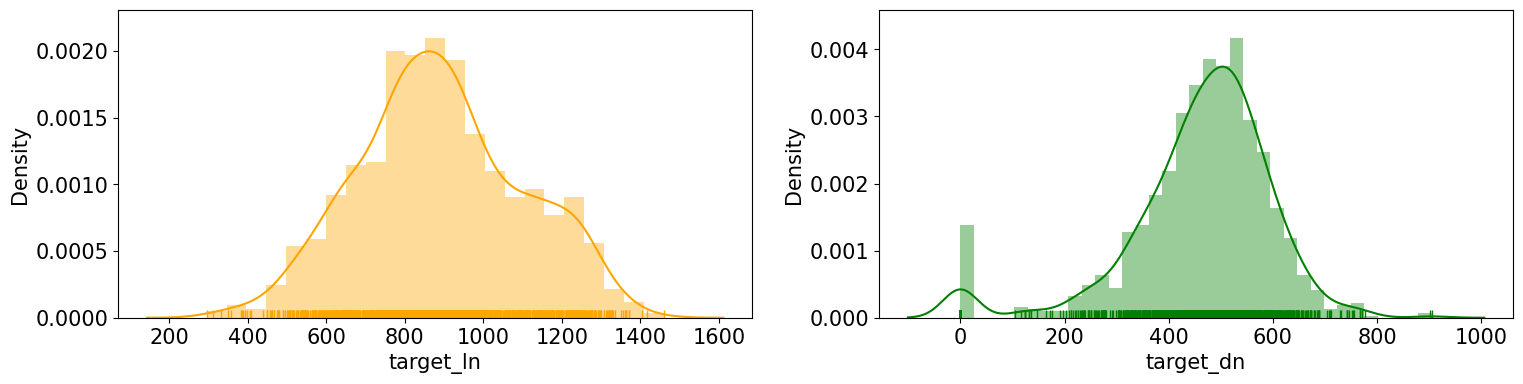

In [95]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
#kde -> 분포 선(kernel density plot)을 그려줌 rug-> rugplot
sns.distplot(train["target_ln"], ax = ax[0], color = 'orange', kde = True, rug = True)
sns.distplot(train["target_dn"], ax = ax[1], color = 'green', kde = True, rug = True)
plt.show()

- 점심 이용자수는 눈에 띄는 특징은 없음, 정규분포에 가까움.
  - 이용자수가 200명 남짓에서 1600명까지 넓게 퍼져있음
- 저녁 이용자수 역시 정규분포에 가깝지만 0이라는 이상치 존재 
  - 이용자수는 몇 백명 (100~800여 명) 정도의 범위이고, 전반적으로 점심보다 저녁 이용자수가 더 적다.

2.2 일자별 분석

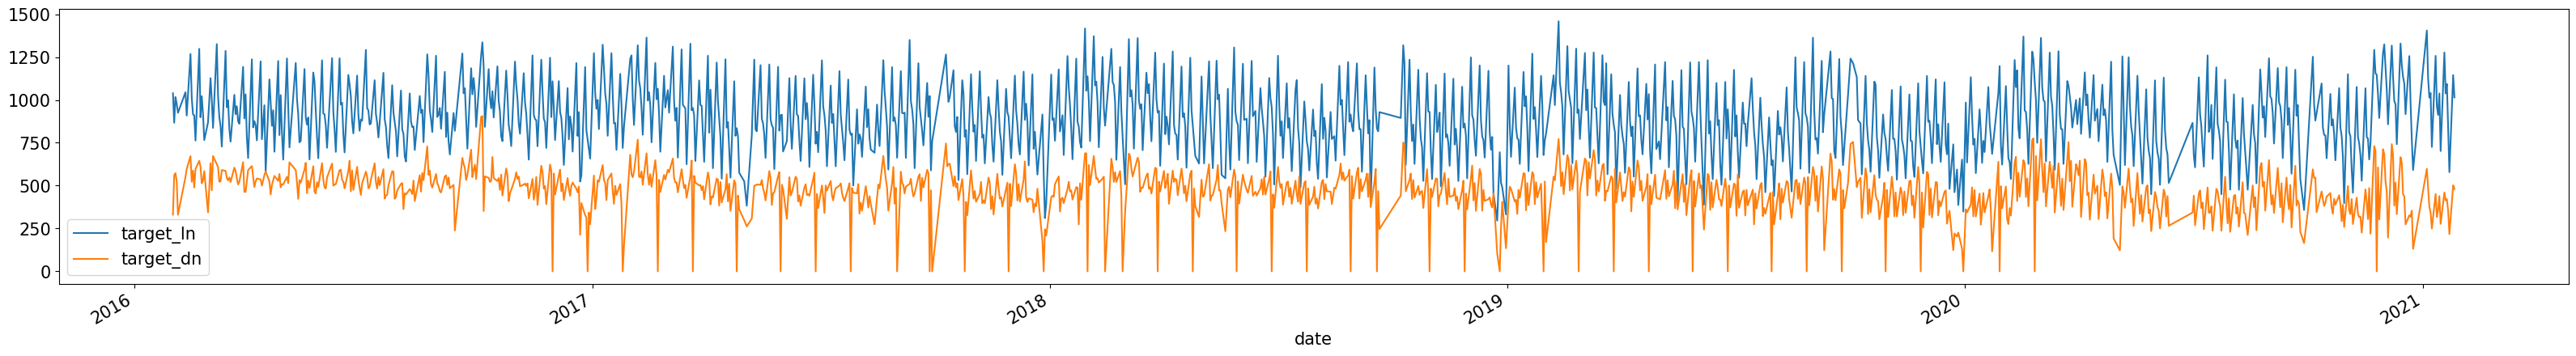

In [96]:
train.plot(x = 'date', y = ['target_ln', 'target_dn'], figsize = (40, 5))
plt.show()

- 일자별 분석을 확인하면 코로나 초기에 급격하게 식수인원이 줄어드는 지점을 확인할 수 있다.

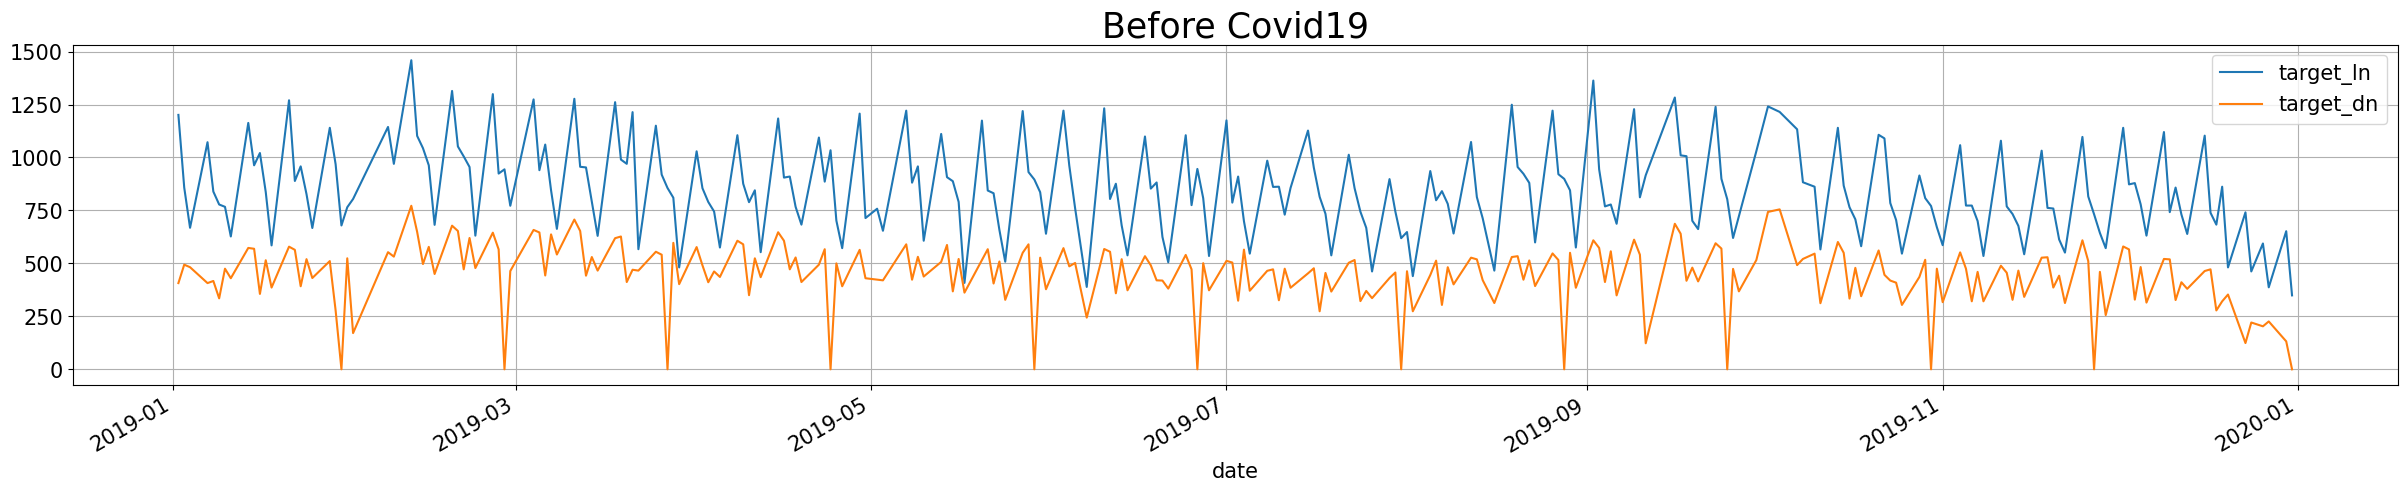

In [97]:
before_covid = train[train['date'].dt.year == 2019][['date', 'target_ln', 'target_dn']]
before_covid.plot(x = 'date', y = ['target_ln', 'target_dn'], figsize = (30, 5), grid = True)
plt.title('Before Covid19', fontsize = 25)
plt.show()

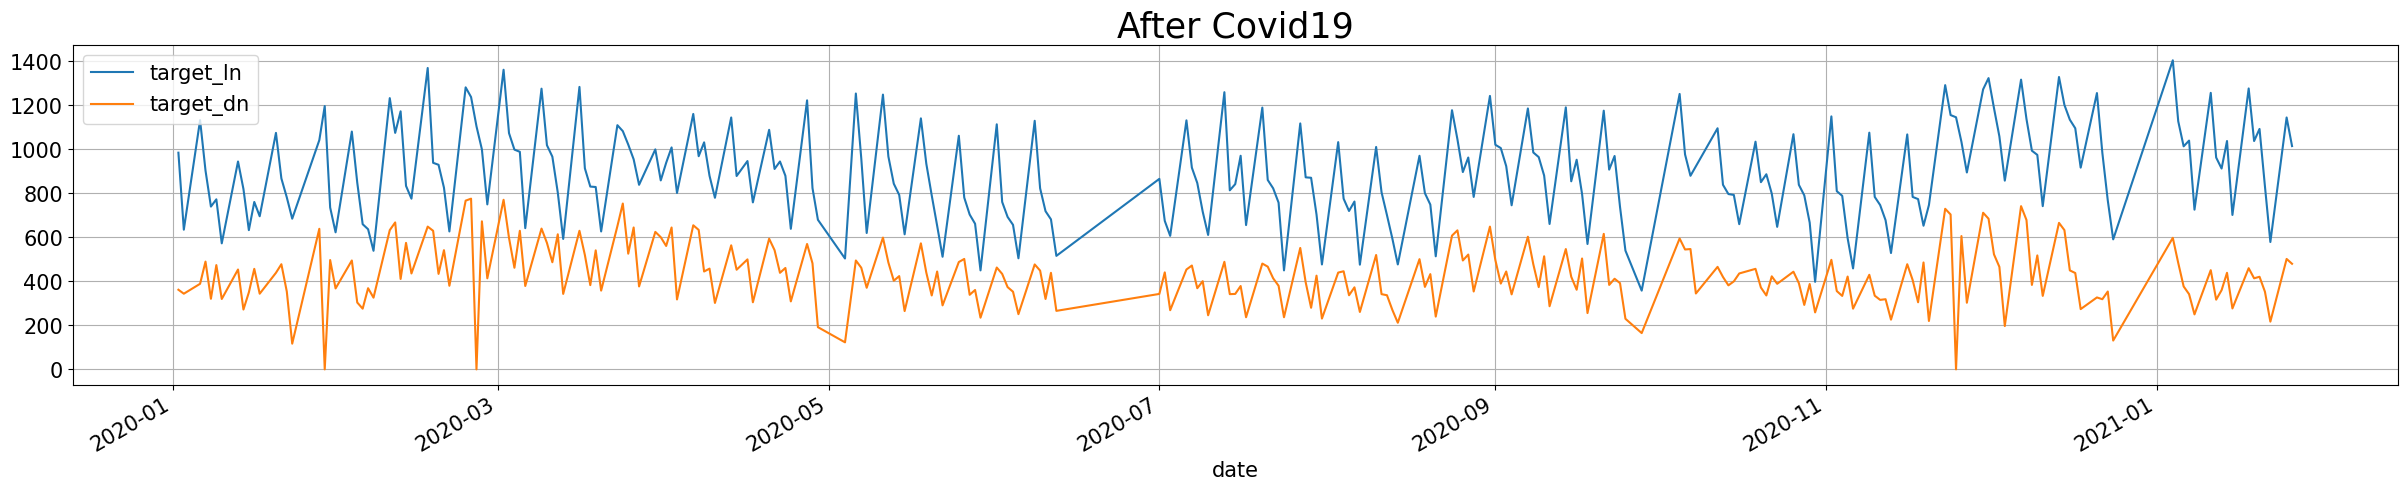

In [98]:
after_covid = train[train['date'].dt.year >= 2020][['date', 'target_ln', 'target_dn']]
after_covid.plot(x = 'date', y = ['target_ln', 'target_dn'], figsize = (30, 5), grid = True)
plt.title('After Covid19', fontsize = 25)
plt.show()

In [99]:
print('점심:', '2019년에는', round(before_covid.target_ln.mean(), 2), ', 2020년에는', round(after_covid.target_ln.mean(), 2))
print('저녁:', '2019년에는', round(before_covid.target_dn.mean(), 2), ', 2020년에는', round(after_covid.target_dn.mean(), 2))

점심: 2019년에는 850.51 , 2020년에는 890.97
저녁: 2019년에는 445.39 , 2020년에는 428.34


하지만 2019년과 2020년의 평균 인원만 보니, 딱히 코로나19로 인한 변화는 크게 없어보임.

- 오히려 점심의 경우, 2020년 이용자수 평균(890명)이 2019년(850명)보다 높게 측정됨

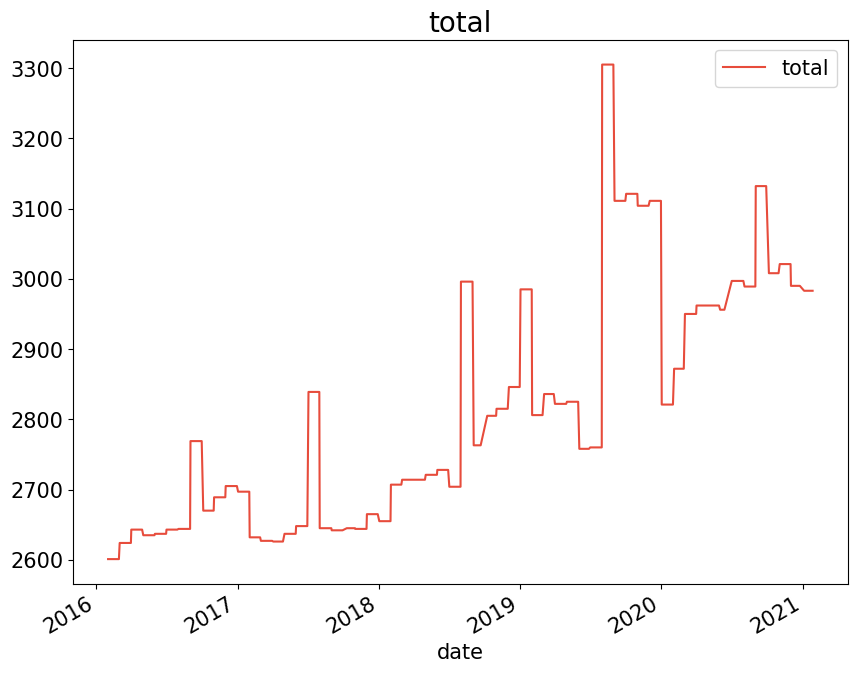

In [100]:
train.plot(x = 'date', y = 'total', figsize = (10, 8), c = "#e74c3c")
plt.title("total", fontsize = 20)
plt.show()

총인원의 변화를 살펴보니 2019년말에 총인원이 급증하여서 1년단위로 보았을 때는 차이가 나지 않을 수 있지만, 비율로만 보면 코로나로 인해 식사하는 사람들의 비율이 줄어들었음을 확인할 수 있음.

2.3 변수 간 상관관계

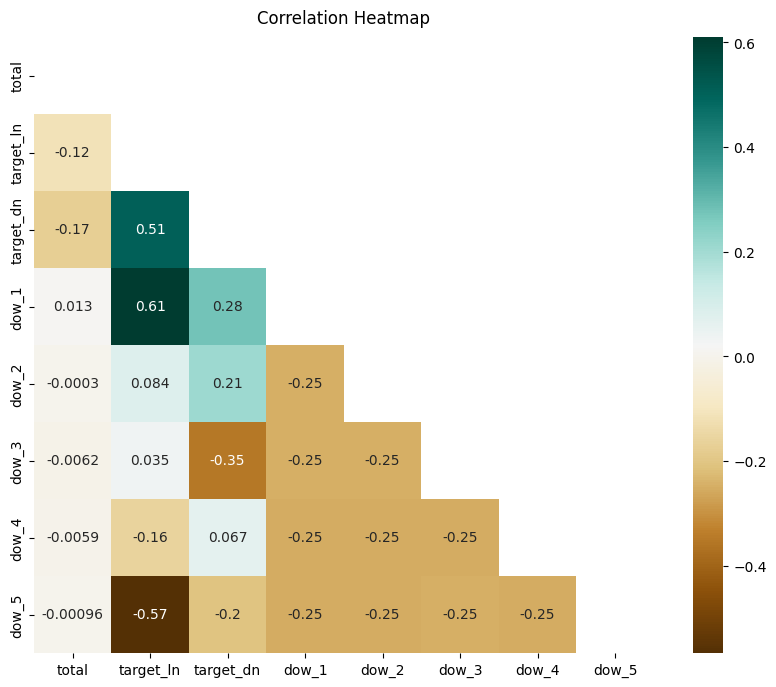

In [101]:
df = train[['total', 'dow', 'target_ln', 'target_dn']]

#범주형 data one hot encoding
df = pd.get_dummies(data=df)

mask = np.triu(np.ones_like(df.corr())) #upper tri 1로 바꾸기
plt.rcParams['font.size'] = 10

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), #pearson corr
            annot=True, #셀의 값 표기 여부
            cmap="BrBG", #색깔 
            mask=mask
            )
ax.set_title('Correlation Heatmap', pad = 10)
plt.show()


일반적으로, 상관계수의 크기가 0.4 이상이면 상관성이 있다고 볼 수 있다.

점심식사 인원은 저녁식사인원과 0.51, 월요일과 0.61의 유의미한 양의 상관관계를 가지며, 금요일과 -0.57의 유의미한 음의 상관관계를 가진다.

저녁식사 인원은 수요일과 -0.35만큼 음의 상관관계를 가진다.

2.4 월별 요일별 패턴

(1) 점심 및 저녁 이용자 수 가설
  - 월별로 차이: 6월과 12월은 이용자수가 많을 것이다.
  - 요일: 금요일 저녁은 수가 줄 것

In [102]:
tmp = train[['date', 'dow', 'total', 'target_ln', 'target_dn']]
tmp['month'] = tmp['date'].dt.strftime("%m")

tmp_ln = tmp.groupby(['dow', 'month'])['target_ln'].mean().reset_index().pivot('dow', 'month', 'target_ln')
tmp_dn = tmp.groupby(['dow', 'month'])['target_dn'].mean().reset_index().pivot('dow', 'month', 'target_dn')

In [103]:
tmp_ln.head()

month,01,02,03,04,05,06,07,08,09,10,11,12
dow,,,,,,,,,,,,
1,1210.210526,1245.526316,1239.428571,1156.045455,1103.263158,1131.823529,1106.391304,1109.800000,1148.750000,1127.263158,1134.714286,1047.350000
2,994.500000,1006.055556,975.476190,863.476190,935.315789,925.470588,887.545455,893.523810,933.263158,964.157895,881.523810,859.300000
3,918.095238,1004.666667,974.428571,895.315789,924.285714,890.764706,839.090909,869.045455,930.944444,920.368421,855.954545,857.947368
4,856.095238,936.736842,910.500000,839.100000,781.619048,807.157895,765.952381,798.318182,822.777778,859.611111,764.545455,760.190476
5,679.333333,756.789474,683.136364,650.190476,608.000000,612.250000,629.227273,628.181818,684.105263,690.470588,614.545455,626.809524


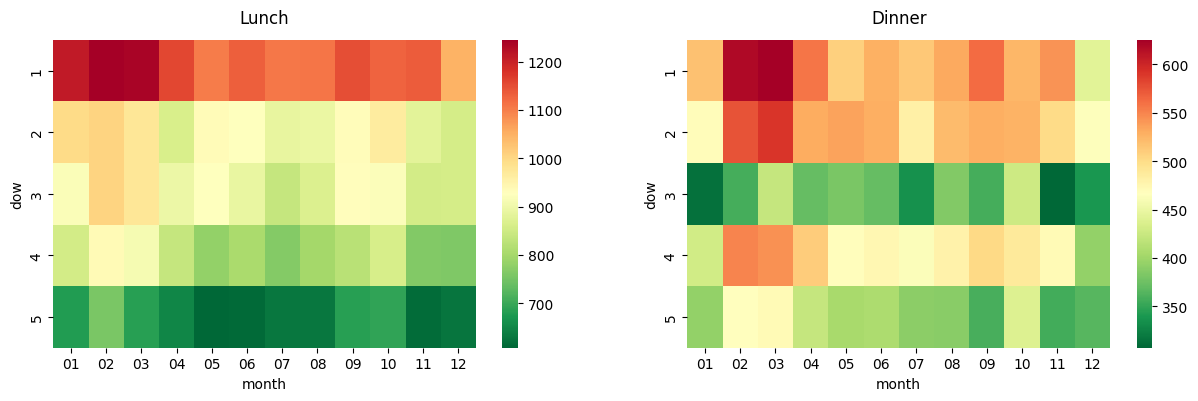

In [104]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
ax[0].set_title('Lunch', pad = 12)
sns.heatmap(tmp_dn, cmap='RdYlGn_r', ax=ax[1])
ax[1].set_title('Dinner', pad = 12)

plt.show()

점심
- 월요일에 압도적으로 이용자수가 많음.
  - 월요일이라도 2월과 3월에는 이용자수가 더 많음
  - 1년 내내 월요일이 다른 날 보다 많음
- 2월 3월에는 화요일과 수요일에 대략 1000명정도의 사람이 있음
- 목요일 금요일에는 이용자 수가 적음

저녁
- 점심과 마찬가지로 월요일이 가장 많음
- 화요일에도 이용자수가 비슷하게 많음
- 수요일에는 저녁 이용자 수가 매우 적음 -> 이상치 때문으로 추정

<Strong>저녁 식수인원 이상치 확인<Strong>

In [105]:
train[train.target_dn == 0][['date', 'dn', 'target_dn']]

,date,dn,target_dn
204,2016-11-30,*,0
224,2016-12-28,*,0
244,2017-01-25,*,0
262,2017-02-22,*,0
281,2017-03-22,*,0
306,2017-04-26,*,0
327,2017-05-31,*,0
346,2017-06-28,*,0
366,2017-07-26,가정의날,0
392,2017-09-01,*,0


저녁 이용자가 0명이었던 이유

2017-09-27은 2017년의 유명한 황금연휴 전 주 / 2018-02-14은 설날 연휴 전 날

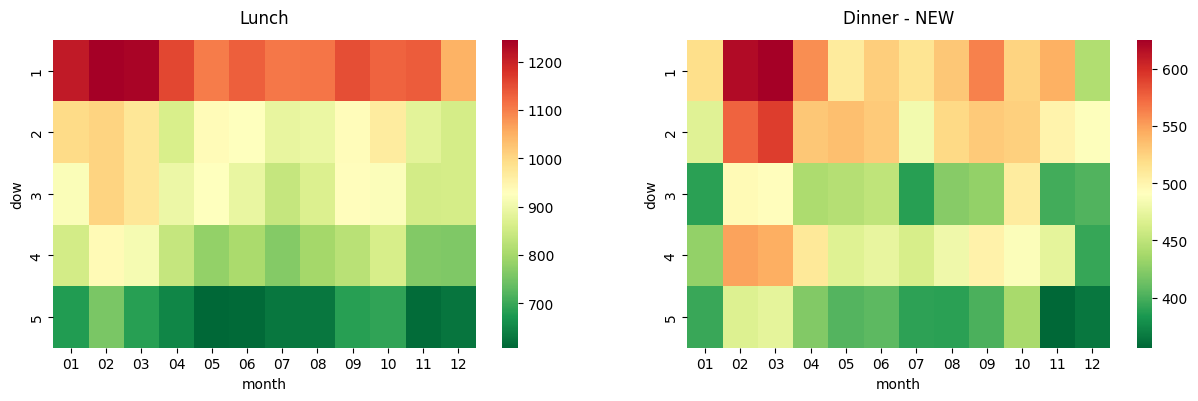

In [106]:
# 이상치 삭제 
idx = train[train.target_dn == 0].index
tmp = train.drop(idx)
tmp['month'] = tmp['date'].dt.strftime("%m")
tmp_dn2 = tmp.groupby(['dow', 'month'])['target_dn'].mean().reset_index().pivot('dow', 'month', 'target_dn')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
ax[0].set_title('Lunch', pad = 12)
sns.heatmap(tmp_dn2, cmap='RdYlGn_r', ax=ax[1])
ax[1].set_title('Dinner - NEW', pad = 12)

plt.show()

- 이상치를 제외하니 수요일보다 금요일이 더 저녁식사 인원이 적음: 가설 확인
- 2,3월 월 화에는 많은 편
=> 요일별 패턴이 중요한듯


다중회귀 분석 실행

In [107]:
final = train[['date', 'dow', 'total', 'target_ln', 'target_dn', 'bob', 'gook', 'banchan1']]
final['month'] = final['date'].dt.strftime("%m").astype('category')
final['dow'] = final['dow'].astype('category')

1. targe_ln 예측

1. data 분리하기

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# 메뉴중에서는 밥이 무엇인지만 포함 (국, 반찬은 종류가 다양해서 예측에 유의미한 정보를 가지고 있지 않음, 오히려 예측에 불리하게 작용)
x = final[['month', 'dow', 'total', 'bob']]
y = final[['target_ln']]

In [110]:
#범주형 data one hot encoding
x = pd.get_dummies(data=x, drop_first=True)
x.head()

,total,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,...,bob_짜장덮밥,bob_짜장밥,bob_참치회덮밥,bob_카레덮밥,bob_카레라이스,bob_콩나물밥,bob_콩나물밥*달래장,bob_콩나물밥*양념장,bob_파인애플볶음밥,bob_호박된장국
0,2601,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2601,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2601,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2601,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2601,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

2. 회귀 분석

In [112]:
from sklearn.linear_model import LinearRegression

mlr_ln = LinearRegression()
mlr_ln.fit(x_train, y_train) 

LinearRegression()

In [113]:
y_predict = mlr_ln.predict(x_test)

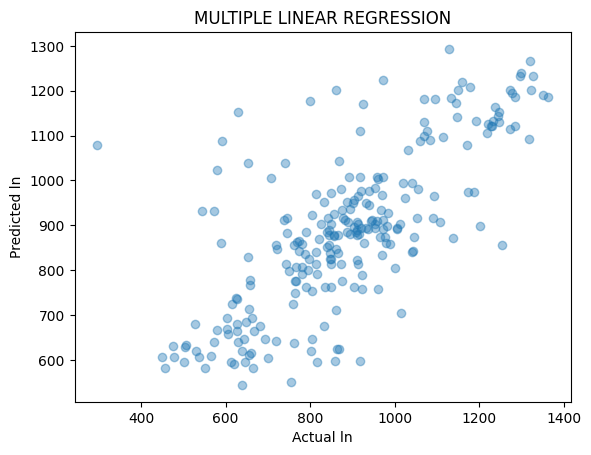

In [114]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual ln")
plt.ylabel("Predicted ln")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [115]:
print(mlr_ln.intercept_, mlr_ln.coef_, mlr_ln.score(x_train, y_train))


[1956.1169826] [[-1.46358966e-01  5.47637386e+01  2.10571180e+01 -4.70160453e+01
  -7.76036467e+01 -6.76274702e+01 -9.00376564e+01 -6.72891909e+01
  -2.02413077e+01 -1.00958963e+01 -7.36316324e+01 -1.01383523e+02
  -2.26378127e+02 -2.29120152e+02 -3.28278425e+02 -4.95483345e+02
  -1.10645236e+02 -4.25207553e+02 -2.65101267e+02 -2.00102336e+02
  -3.91513020e+02 -4.13402934e+02 -3.86490677e+02 -4.96723526e+02
  -3.19054427e+02 -3.63797881e-12 -2.91290565e+02 -3.79819823e+02
  -3.51754995e+02 -3.71463903e+02 -3.25737309e+02 -3.34863922e+02
  -3.95163081e+02 -4.54908773e+02 -3.63615452e+02 -4.24877927e+02
  -4.44369065e+02 -4.10341460e+02 -3.71805939e+02 -4.55369065e+02
  -3.12688888e+02 -3.31008022e+02 -9.31166255e-12 -5.32118188e+02
  -4.16671416e+02 -3.56321353e+02 -3.87315754e+02 -3.75122495e+02
  -1.27946555e+02 -5.66465528e+02 -3.23719654e+02 -4.67440217e+02
   2.80522272e-11 -7.80564897e+01 -2.83438299e+02 -3.68069371e+02
  -2.61290384e+02 -4.19982716e+02 -4.11996049e+02 -3.41163081

In [116]:
#add constant to predictor variables
x = sm.add_constant(x_train)

#fit linear regression model
model = sm.OLS(y_train, x_train).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              target_ln   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              522.3
Date:                Sat, 27 May 2023   Prob (F-statistic):                        0.00
Time:                        00:06:44   Log-Likelihood:                         -6067.9
No. Observations:                 964   AIC:                                  1.230e+04
Df Residuals:                     883   BIC:                                  1.269e+04
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

target_in(점심) 잔차분석

In [117]:
from statsmodels.formula.api import ols
residual = y_test - y_predict

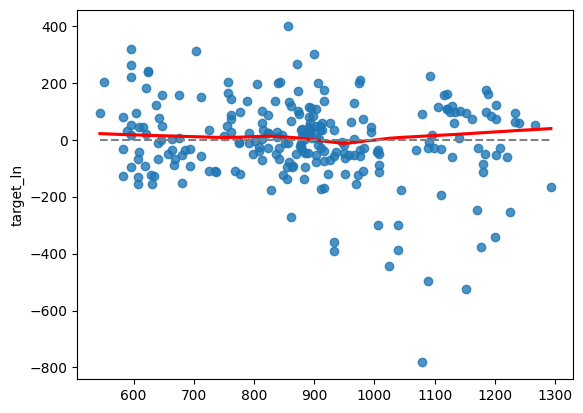

In [118]:
# 모형의 선형성 확인
sns.regplot(y_predict, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')

In [119]:
# 잔차의 정규성 확인 ( 샤피로 검정 ) -> 잔차는 정규분포를 따른다고 가정
import scipy.stats
sr = scipy.stats.zscore(residual)
scipy.stats.shapiro(residual) # p-value 값을 보아 귀무가설을 기각 -> 잔차의 정규성이 위반되었다고 판단한다.

ShapiroResult(statistic=0.9307801723480225, pvalue=3.2977247599319526e-09)

<Axes: ylabel='target_ln'>

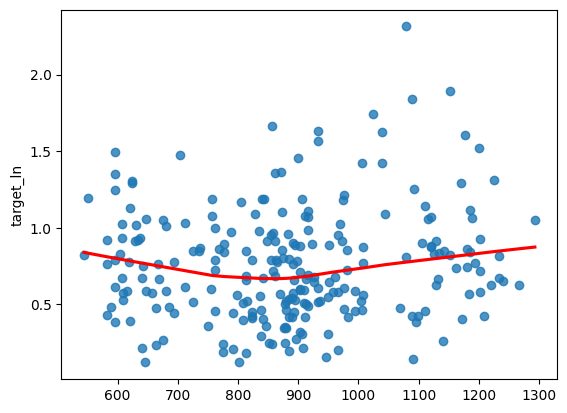

In [120]:
# 잔차의 등분산성 확인 -> 빨간 실선이 수평이면 이상적임
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

2. target_dn 예측

In [121]:
# 메뉴중에서는 밥이 무엇인지만 포함
x = final[['month', 'dow', 'total', 'target_ln', 'bob']]
y = final[['target_dn']]

In [122]:
#범주형 data one hot encoding
x = pd.get_dummies(data=x, drop_first=True)
x.head()

,total,target_ln,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,...,bob_짜장덮밥,bob_짜장밥,bob_참치회덮밥,bob_카레덮밥,bob_카레라이스,bob_콩나물밥,bob_콩나물밥*달래장,bob_콩나물밥*양념장,bob_파인애플볶음밥,bob_호박된장국
0,2601,1039,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2601,867,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2601,1017,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2601,978,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2601,925,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [124]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [125]:
y_predict = mlr.predict(x_test)

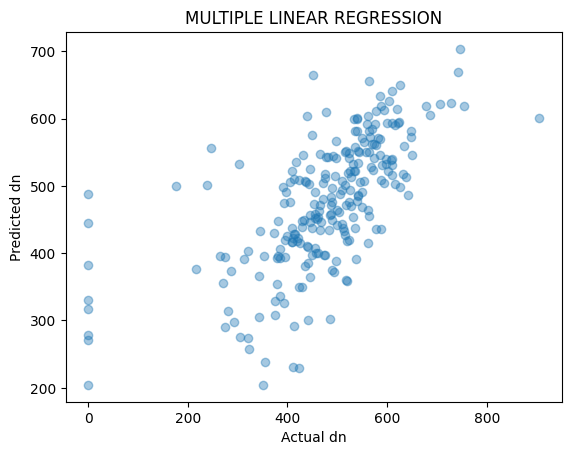

In [126]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual dn")
plt.ylabel("Predicted dn")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [127]:
print(mlr.coef_)
print(mlr.score(x_train, y_train))

[[-3.41867024e-02  4.34309377e-01  5.78955506e+01  7.80293282e+01
   6.81869751e+01  5.15139366e+01  5.22493448e+01  5.27059656e+01
   7.75673321e+01  6.85218424e+01  7.27886179e+01  5.93047319e+01
   2.15539934e+01  8.56268260e+01 -4.64406481e+01  7.96640458e+01
   9.31121217e+01 -1.00213802e+02 -6.25690704e+01  5.68434189e-13
  -1.12478915e-11 -2.40679379e+01 -1.08804410e+01 -9.69313187e+01
  -6.66200636e+01 -8.79928947e+01 -7.42766762e+01 -5.56618116e+01
  -1.02233328e+02 -8.90961158e+01 -1.54539792e+02 -2.51887830e+00
  -1.28071167e+02 -4.38116208e+01 -6.13017403e+01 -2.72084634e+02
  -4.54963482e+01 -1.36554568e+02 -1.10161118e+02  2.22518772e+01
  -1.46777165e+02 -1.06645013e+02 -6.16697145e+01 -2.13162821e-14
   2.31060477e+01 -1.56592405e+02 -6.06416209e+01 -4.52372987e+01
   4.47569530e+01 -6.32383035e-13 -1.57961046e+02  5.47117907e-13
  -1.78879628e+01 -1.07777610e+02 -1.29120006e+01 -1.50678841e+02
  -1.29957351e+02 -5.82323854e+01 -2.39631973e+02 -1.80262912e+02
  -1.13264

In [128]:
#add constant to predictor variables
x = sm.add_constant(x_train)

#fit linear regression model
model = sm.OLS(y_train, x_train).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              target_dn   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              245.4
Date:                Sat, 27 May 2023   Prob (F-statistic):                        0.00
Time:                        00:06:46   Log-Likelihood:                         -5777.6
No. Observations:                 964   AIC:                                  1.172e+04
Df Residuals:                     880   BIC:                                  1.213e+04
Df Model:                          84                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

0일 때 예측이 떨어짐. 0을 제외하고 확인.

In [129]:
# 이상치 삭제
idx = final[final.target_dn == 0].index
final_drop0 = final.drop(idx)

In [130]:
# 메뉴중에서는 밥이 무엇인지만 포함
x = final_drop0[['month', 'dow', 'total', 'target_ln', 'bob']]
y = final_drop0[['target_dn']]

In [131]:
#범주형 data one hot encoding
x = pd.get_dummies(data=x, drop_first=True)
x.head()

,total,target_ln,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,...,bob_짜장덮밥,bob_짜장밥,bob_참치회덮밥,bob_카레덮밥,bob_카레라이스,bob_콩나물밥,bob_콩나물밥*달래장,bob_콩나물밥*양념장,bob_파인애플볶음밥,bob_호박된장국
0,2601,1039,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2601,867,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2601,1017,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2601,978,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2601,925,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [133]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [134]:
y_predict = mlr.predict(x_test)

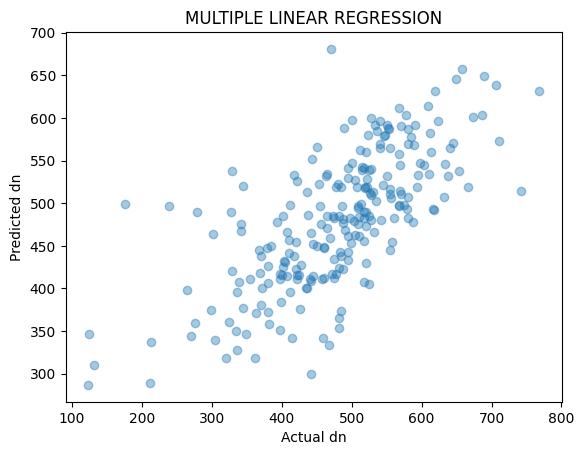

In [135]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual dn")
plt.ylabel("Predicted dn")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [136]:
print(mlr.coef_)
print(mlr.score(x_train, y_train))

[[-2.45702266e-02  4.02696432e-01  6.19740016e+01  9.09973910e+01
   6.77613664e+01  5.39208210e+01  5.32619445e+01  3.97379223e+01
   6.69186584e+01  6.10249065e+01  6.70408428e+01  5.78357698e+01
   2.18656240e+01  7.09029037e+01  8.76719301e+00  6.80258507e+01
   6.74372561e+01 -2.18543660e+01 -1.47082346e-12 -6.14613418e+01
  -3.01980663e-12  1.56172304e+01 -8.64813897e+01  6.26592128e+00
   4.70028170e+01 -2.27667976e+01 -1.31000047e+01 -6.65938052e+01
  -9.94193763e+00 -2.18301630e+01 -4.84511990e+01 -9.10351956e+00
  -1.79886610e+01  2.09461085e+01  5.53263187e+00  1.00281650e-01
  -1.31592515e-11 -7.72897693e+01 -7.35008223e+01  1.74431455e+01
  -8.78601085e+01 -7.66726438e+01 -7.57065230e+01  8.95816754e-12
   1.22080069e+01  3.61059806e+01 -5.83673414e+01 -5.23288816e+01
  -7.73248132e-12 -1.30040951e+02 -1.73013921e+02 -3.19367306e+01
  -1.29135834e+01 -4.73427005e+01  5.05481240e+01 -4.24449402e+01
  -6.73795087e+01 -4.17816944e+01  2.68727263e-11 -1.12473979e+02
  -9.94448

In [137]:
#add constant to predictor variables
x = sm.add_constant(x_train)

#fit linear regression model
model = sm.OLS(y_train, x_train).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              target_dn   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              548.5
Date:                Sat, 27 May 2023   Prob (F-statistic):                        0.00
Time:                        00:06:47   Log-Likelihood:                         -5209.1
No. Observations:                 929   AIC:                                  1.059e+04
Df Residuals:                     845   BIC:                                  1.099e+04
Df Model:                          84                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

target_dn(저녁) 잔차분석

회귀분석 결과를 바탕으로 잔차분석을 진행

In [138]:
from statsmodels.formula.api import ols

In [139]:
residual = y_test - y_predict

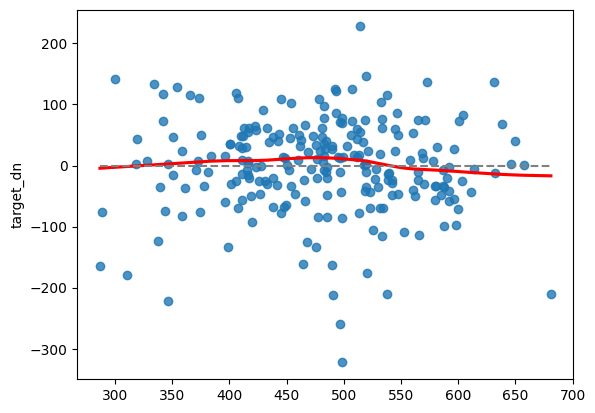

In [140]:
# 모형의 선형성 확인
sns.regplot(y_predict, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')

In [141]:
# 잔차의 정규성 확인 ( 샤피로 검정 ) -> 잔차는 정규분포를 따른다고 가정
import scipy.stats
sr = scipy.stats.zscore(residual)
scipy.stats.shapiro(residual) # p-value 값을 보아 유의수준 5%에서 잔차의 정규성이 위반되었다고 판단한다.

ShapiroResult(statistic=0.9657192230224609, pvalue=2.126468825736083e-05)

<Axes: ylabel='target_dn'>

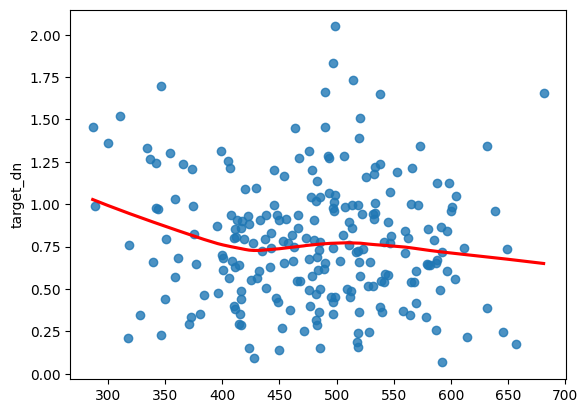

In [142]:
# 잔차의 등분산성 확인 -> 빨간 실선이 수평이면 이상적임
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})